##### Vasilii Mosin

# Celestial Mechanics

In [1]:
import numpy as np
import ephem
from pyorbital import orbital
from datetime import datetime

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
OBS_LAT = 55
OBS_LON = 37

In [3]:
reference = datetime(2019,1,30,0,0,0)
print(reference)

2019-01-30 00:00:00


Instead of using curren TLE I use the older one, which is closer to the reference date. I create two objects from different libraries below.

In [4]:
terra_pyorb = orbital.Orbital("TERRA",
                      line1="1 25994U 99068A   19034.18769075 -.00001285  00000-0 -27521-3 0  9999",
                      line2="2 25994  98.2065 110.6967 0001436  95.4318 264.7175 14.57107395 17467")

terra_ephem = ephem.readtle("TERRA",
                            "1 25994U 99068A   19034.18769075 -.00001285  00000-0 -27521-3 0  9999",
                            "2 25994  98.2065 110.6967 0001436  95.4318 264.7175 14.57107395 17467")

In [5]:
observer = ephem.Observer()
observer.lon, observer.lat = str(OBS_LON), str(OBS_LAT)
observer.date = reference

## Problem 2.1

In [6]:
position, velocity = terra_pyorb.get_position(reference, normalize=False)
lon, lat, alt = terra_pyorb.get_lonlatalt(reference)
az, el = terra_pyorb.get_observer_look(reference, OBS_LON, OBS_LAT, 0)

# we can easily get range using ephem library
terra_ephem.compute(observer)
r = terra_ephem.range

#### Answer:

In [7]:
print('Cartesian coordinates (km):', position)
print('Lon-Lat-Alt (deg and m):', lon, lat, alt)
print('Az-El-Range (deg and m):', az, el, r)

Cartesian coordinates (km): [-1906.96737083  6781.51402956   737.34619479]
Lon-Lat-Alt (deg and m): -23.238277409145393 6.0113226289216914 705.1154401035766
Az-El-Range (deg and m): 248.39839064247045 -29.716153681301538 7573251.5


## Problem 2.2

In [8]:
result = terra_pyorb.get_next_passes(reference, length=10, lon=OBS_LON, lat=OBS_LAT, alt=0, horizon=10)

#### Answer:

In [9]:
print('First contact AOS:', result[0][0])
print('First contact LOS:', result[0][1])

First contact AOS: 2019-01-30 07:05:34.977835
First contact LOS: 2019-01-30 07:11:11.253881


## Problem 2.3

In [10]:
culm_event = result[0][2]
_, culm_el = terra_pyorb.get_observer_look(culm_event, lon=OBS_LON, lat=OBS_LAT, alt=0)

#### Answer:

In [11]:
print('First pass culmination event time:', culm_event)
print('First pass culmination elevation (deg):', culm_el)

First pass culmination event time: 2019-01-30 07:08:23.536938
First pass culmination elevation (deg): 15.34982590629578


## Problem 2.4

In [12]:
result = terra_pyorb.get_next_passes(reference, length=150, lon=OBS_LON, lat=OBS_LAT, alt=0, horizon=60)

#### Answer:

In [13]:
print('1st imaging event (culmination time):', result[0][2])
print('2nd imaging event (culmination time):', result[1][2])
print('3rd imaging event (culmination time):', result[2][2])
print('4th imaging event (culmination time):', result[3][2])
print('5th imaging event (culmination time):', result[4][2])

1st imaging event (culmination time): 2019-01-30 08:46:52.924224
2nd imaging event (culmination time): 2019-01-31 19:04:43.663560
3rd imaging event (culmination time): 2019-02-01 08:34:38.384693
4th imaging event (culmination time): 2019-02-03 19:35:18.722960
5th imaging event (culmination time): 2019-02-04 09:05:12.431694


## Problem 2.5

To simulate a constellation I keep inclination and ellipse size the same, change only ascending node position. Need to fix checksum in one case (satellite_3).

In [14]:
satellite_1 = orbital.Orbital("TERRA",
                      line1="1 25994U 99068A   19034.18769075 -.00001285  00000-0 -27521-3 0  9999",
                      line2="2 25994  98.2065 110.6967 0001436  95.4318 264.7175 14.57107395 17467")

satellite_2 = orbital.Orbital("TERRA",
                      line1="1 25994U 99068A   19034.18769075 -.00001285  00000-0 -27521-3 0  9999",
                      line2="2 25994  98.2065 200.6967 0001436  95.4318 264.7175 14.57107395 17467")

satellite_3 = orbital.Orbital("TERRA",
                      line1="1 25994U 99068A   19034.18769075 -.00001285  00000-0 -27521-3 0  9999",
                      line2="2 25994  98.2065 290.6967 0001436  95.4318 264.7175 14.57107395 17466")

satellite_4 = orbital.Orbital("TERRA",
                      line1="1 25994U 99068A   19034.18769075 -.00001285  00000-0 -27521-3 0  9999",
                      line2="2 25994  98.2065 20.6967  0001436  95.4318 264.7175 14.57107395 17467")

In [15]:
result = np.concatenate(([timestamp[2] for timestamp in 
             satellite_1.get_next_passes(reference, length=150, lon=OBS_LON, lat=OBS_LAT, alt=0, horizon=60)],
                            [timestamp[2] for timestamp in 
             satellite_2.get_next_passes(reference, length=150, lon=OBS_LON, lat=OBS_LAT, alt=0, horizon=60)],
                            [timestamp[2] for timestamp in 
             satellite_3.get_next_passes(reference, length=150, lon=OBS_LON, lat=OBS_LAT, alt=0, horizon=60)],
                            [timestamp[2] for timestamp in 
             satellite_4.get_next_passes(reference, length=150, lon=OBS_LON, lat=OBS_LAT, alt=0, horizon=60)]))

In [16]:
result.sort()

#### Answer:

In [17]:
print('1st imaging event (culmination time):', result[0])
print('2nd imaging event (culmination time):', result[1])
print('3rd imaging event (culmination time):', result[2])
print('4th imaging event (culmination time):', result[3])
print('5th imaging event (culmination time):', result[4])

1st imaging event (culmination time): 2019-01-30 08:46:52.924224
2nd imaging event (culmination time): 2019-01-30 13:24:35.554761
3rd imaging event (culmination time): 2019-01-31 00:57:06.294344
4th imaging event (culmination time): 2019-01-31 02:54:31.101861
5th imaging event (culmination time): 2019-01-31 07:32:14.597322


Now, first five imaging events happen in less than 24 hours.

## Problem 2.6

In [18]:
timestamp = datetime(2018,1,1,0,0,0)

observer = ephem.Observer()
observer.lon, observer.lat = str(OBS_LON), str(OBS_LAT)
observer.date = timestamp

In [19]:
f = open('terra-2018.tle.txt', 'r')
tle_strings = f.readlines()

distances = []

for i in range(0,len(tle_strings),3):
    line_0 = tle_strings[i][:-1]
    line_1 = tle_strings[i+1][:-1]
    line_2 = tle_strings[i+2][:-1]
    
    satellite = ephem.readtle(line_0, line_1, line_2)
    satellite.compute(observer)
    distances.append(satellite.range)
    
errors = [abs(d-distances[0]) for d in distances]

#### Answer:

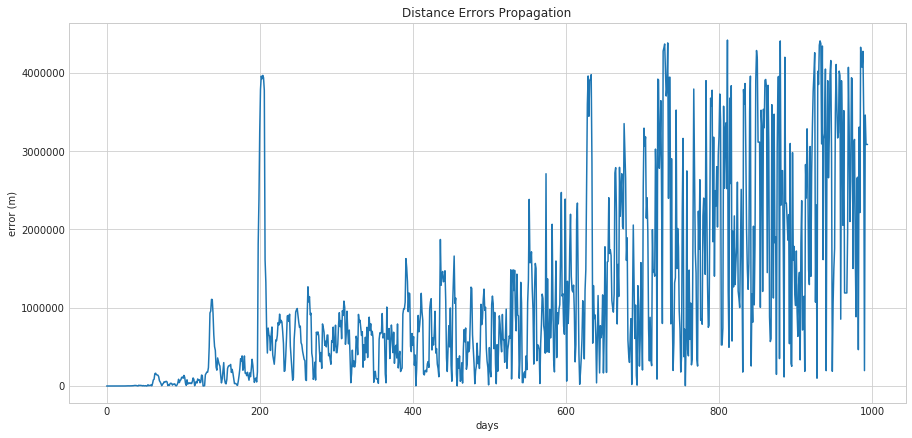

In [24]:
plt.figure(figsize=(15,7))
plt.plot(errors)
plt.title('Distance Errors Propagation')
plt.xlabel('days')
plt.ylabel('error (m)')
plt.show()